In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

In [2]:
layer_num = 5

In [3]:
simCLR = torch.load("./Models/simCLR_layer"+str(layer_num)+".pt").cpu()
MLP = torch.load("./Models/mlp_layer"+str(layer_num)+".pt").cpu()

In [4]:
SimCLR_extract_output = list(simCLR.children())[0]
SimCLR_Layer_List = list(list(list(SimCLR_extract_output.children())[0].children())[0].children())
SimCLR_Layer_List[0]

Linear(in_features=784, out_features=200, bias=True)

In [5]:
MLP_extract_output = nn.Sequential(*list(MLP.children())[0])

In [6]:
MLP_weight = []
i = 0
for name,param in MLP_extract_output.named_parameters():
    if name == str(i)+".weight":    
        print(name)
        print(torch.Tensor(param.cpu().detach().numpy()).size())
        MLP_weight.append(torch.Tensor(param.cpu().detach().numpy()).reshape(1, -1))
        i = i+2

0.weight
torch.Size([200, 784])
2.weight
torch.Size([200, 200])
4.weight
torch.Size([200, 200])
6.weight
torch.Size([150, 200])
8.weight
torch.Size([100, 150])


In [7]:
SimCLR_weight = []
i = 0
for name,param in SimCLR_extract_output.named_parameters():
    if name == "baseModel.layers."+str(i)+".weight":
        
        print(name)
        print(torch.Tensor(param.cpu().detach().numpy()))
        SimCLR_weight.append(torch.Tensor(param.cpu().detach().numpy()).reshape(1, -1))
        i = i+2
        
    

baseModel.layers.0.weight
tensor([[-0.0915, -0.0026,  0.0020,  ...,  0.1659,  0.1196, -0.1352],
        [ 0.0516, -0.0035, -0.1058,  ..., -0.1255,  0.1021,  0.0007],
        [-0.0253,  0.0147,  0.0955,  ..., -0.0751,  0.0260,  0.0292],
        ...,
        [-0.0049, -0.0993, -0.0267,  ...,  0.0190, -0.0434, -0.1379],
        [-0.0648,  0.0080, -0.0206,  ..., -0.0555,  0.0249,  0.0280],
        [ 0.0113, -0.0770, -0.1225,  ..., -0.1739,  0.0813,  0.0133]])
baseModel.layers.2.weight
tensor([[-0.0258,  0.0459, -0.0398,  ..., -0.0889,  0.0566, -0.0980],
        [ 0.1378, -0.0011, -0.1916,  ...,  0.2038,  0.1104, -0.2500],
        [ 0.1868,  0.1186,  0.0648,  ...,  0.0097,  0.1265, -0.0248],
        ...,
        [-0.1621, -0.3651,  0.1053,  ...,  0.0917, -0.0045,  0.0161],
        [ 0.0107, -0.0302, -0.1275,  ..., -0.0836, -0.1102,  0.0059],
        [ 0.0092,  0.0408,  0.0843,  ..., -0.0217,  0.0043,  0.0643]])
baseModel.layers.4.weight
tensor([[ 0.0344, -0.0548, -0.0846,  ..., -0.4084, -0.

In [8]:
SimCLR_weight[1].size()

torch.Size([1, 40000])

C:\Users\KING\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\KING\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


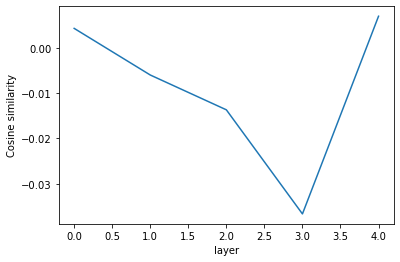

In [9]:
weight_similarity = []
for j in range(len(MLP_weight)):
    
    #features_weight.append(SimCLR_weight[j])
    #features_weight.append(MLP_weight[j])
    
    weight_similarity .append(F.cosine_similarity(SimCLR_weight[j],MLP_weight[j]))
    
plt.plot(weight_similarity)

plt.ylabel('Cosine similarity')
plt.xlabel('layer')

plt.savefig('./Weight_similarity_image/layer'+str(len(MLP_weight))+'.png')

plt.show()    
    


  
        
        #plt.savefig('./cos_image/Sum'+str(len(AdTest_SimCLR_files))+'layer'+ str(i)+'_target_'+ str(j)+'.png')

In [10]:
#F.cosine_similarity(SimCLR_weight[0],MLP_weight[0])

In [11]:
#F.cosine_similarity(SimCLR_weight[1],MLP_weight[1])

In [12]:
#F.cosine_similarity(SimCLR_weight[2],MLP_weight[2])

In [13]:
#F.cosine_similarity(SimCLR_weight[3],MLP_weight[3])

In [14]:
#F.cosine_similarity(torch.rand(1,156800),torch.rand(1,156800))